<a href="https://colab.research.google.com/github/fedebaldasso/Data-Science/blob/main/DecisionTree%2BPeiti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ejemplo

In [ ]:
import numpy as np
import pandas as pd


## Adquisicion de datos

Tendremos dos datasets un train y test ya predeterminados 

In [ ]:
#obtencion de informacion de dataset
#train
df_train = pd.read_csv("ds_salaries_train.csv")

#test
df_test = pd.read_csv("ds_salaries_test.csv")
#df_submission = pd.read_csv('https://raw.githubusercontent.com/mathias-brandewinder/Kaggle-Titanic/master/Titanic/Data/submission.csv', names=['Survived'])
#df_test = pd.concat([df_test, df_submission], axis=1)

In [ ]:
df_train.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [ ]:
df_test.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,424,2022,SE,FT,Data Scientist,80000,USD,80000,US,0,US,M
1,425,2022,MI,FT,Data Engineer,82900,USD,82900,US,0,US,M
2,426,2022,SE,FT,Data Engineer,100800,USD,100800,US,100,US,L
3,427,2022,MI,FT,Data Engineer,45000,EUR,49461,ES,100,ES,M
4,428,2022,SE,FT,Data Scientist,140400,USD,140400,US,0,US,L


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          424 non-null    int64 
 1   work_year           424 non-null    int64 
 2   experience_level    424 non-null    object
 3   employment_type     424 non-null    object
 4   job_title           424 non-null    object
 5   salary              424 non-null    int64 
 6   salary_currency     424 non-null    object
 7   salary_in_usd       424 non-null    int64 
 8   employee_residence  424 non-null    object
 9   remote_ratio        424 non-null    int64 
 10  company_location    424 non-null    object
 11  company_size        424 non-null    object
dtypes: int64(5), object(7)
memory usage: 39.9+ KB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          183 non-null    int64 
 1   work_year           183 non-null    int64 
 2   experience_level    183 non-null    object
 3   employment_type     183 non-null    object
 4   job_title           183 non-null    object
 5   salary              183 non-null    int64 
 6   salary_currency     183 non-null    object
 7   salary_in_usd       183 non-null    int64 
 8   employee_residence  183 non-null    object
 9   remote_ratio        183 non-null    int64 
 10  company_location    183 non-null    object
 11  company_size        183 non-null    object
dtypes: int64(5), object(7)
memory usage: 17.3+ KB


## Manipulacion de datos

REvision leve de datos nulos y trasnformaciones de los mismos

In [ ]:
df_train.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [ ]:
df_test.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

### Datos nulos

Como tenemos dos datasets , train y test ya definidos. Lo que debemos hacer es trabjar siempre con el train haciendo todo el llenado de datos como generacion de nuevas variables 

Primeros trabajaremos con los datos del train y en base a esos valores , luego llenaremos la informacion en el test set

### Train Datasets



### Llenado de Nulos

Tanto el dataset de train como de test no presentan valores nulos que haya que reemplazar o rellenar.

#Comienzo de Entrenamiento 

Ya tenemos definido un train y un test , por lo cual no es necesario ni hacer un split train- test o hacer un Cross Validation.



### Preprocesamiento de variables categoricas a numericas 

En nuestro caso tenemos variables como experience_level, job_title, company_location y company_size como variables tipo string

Veremos que vamos hacer con algunas de ellas.

En algunos casos vamos a borrar algunas de las variables y ademas vamos a realizar un conocido procesamiento que se llama One Hot Encoding 

In [ ]:
df_train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,424.0,NaN,NaN,NaN,211.5,122.54251,0.0,105.75,211.5,317.25,423.0
work_year,424.0,NaN,NaN,NaN,2021.148585,0.683544,2020.0,2021.0,2021.0,2022.0,2022.0
experience_level,424,4,SE,175,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employment_type,424,4,FT,409,NaN,NaN,NaN,NaN,NaN,NaN,NaN
job_title,424,47,Data Scientist,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary,424.0,NaN,NaN,NaN,398206.143868,1837707.517199,4000.0,64725.0,110000.0,165055.0,30400000.0
salary_currency,424,15,USD,261,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary_in_usd,424.0,NaN,NaN,NaN,107714.346698,73079.77589,2859.0,58670.5,98079.0,144250.0,600000.0
employee_residence,424,49,US,213,NaN,NaN,NaN,NaN,NaN,NaN,NaN
remote_ratio,424.0,NaN,NaN,NaN,67.45283,40.993832,0.0,50.0,100.0,100.0,100.0


In [ ]:
from sklearn.preprocessing import OneHotEncoder

#generate one hot encoder class
encoder = OneHotEncoder(handle_unknown='ignore', #ponemos ignore para poder ommitir cuando puede pasar que no exista los mismos valores 
                        sparse=False) # generarlo como. matrix para poder generar las columnas adecuadas

#entrenamiento para generar el preprocesamiento one hot encoding para las variables indicadas
encoder.fit(df_train[['company_size', 'experience_level']])

#transformo en train datasets en base a la clase generada
cat_encoding = pd.DataFrame(encoder.transform(df_train[['company_size', 'experience_level']]), columns=encoder.get_feature_names(['company_size', 'experience_level']))
cat_encoding.head()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,company_size_L,company_size_M,company_size_S,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
#joineo de las variables que deseo con categoricas encoding
df_all_train = pd.concat([df_train, cat_encoding], axis=1)


#Borrado de columnas no necesarias 
df_all_train.drop(['company_size', 'experience_level', 'salary', 'salary_currency','Unnamed: 0',  'job_title', 'employment_type', 'company_location', 'employee_residence'],axis=1, inplace=True)

#train datasets final
df_all_train.head()

,work_year,salary_in_usd,remote_ratio,company_size_L,company_size_M,company_size_S,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE
0,2020,79833,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2020,260000,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,2020,109024,50,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,2020,20000,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,2020,150000,50,1.0,0.0,0.0,0.0,0.0,0.0,1.0


### Entrenamiento de modelo 

Ahora seleccionaremos el algoritmo basico para poder correr y entrenar un modelo

In [ ]:
#spliteo de datos en target y features for test and train

#seleccion de x values sin el target
X_train = df_all_train.loc[:,df_all_train.columns != 'salary_in_usd']

#seleccion del target
y_train = df_all_train.salary_in_usd


In [ ]:
#training del modelo
from sklearn import tree

model_default = tree.DecisionTreeClassifier(random_state = 42) # con hiperparametros default
model_default.fit(X_train, y_train)

#modelo generado con algun hiperparamtros diferente
model_max_depth = tree.DecisionTreeClassifier(random_state = 42, max_depth=7) 
model_max_depth.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=42)

### Prediccion 

Ya tenemos entrenado el modelo , lo que debemos hacer es ahora transformar los datos del test de la misma manera que el train

In [ ]:
#trasnformacion de test


#one hot encoding 
cat_encoding_test = pd.DataFrame(encoder.transform(df_test[['company_size', 'experience_level']]), columns=encoder.get_feature_names(['company_size', 'experience_level']))
df_all_test = pd.concat([df_test, cat_encoding_test], axis=1)

#borrado de las mismas variables 
df_all_test.drop(['company_size', 'experience_level', 'salary', 'salary_currency','Unnamed: 0',  'job_title', 'employment_type', 'company_location', 'employee_residence'],axis=1, inplace=True)



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# spliteo de datos y target del test
X_test = df_all_test.loc[:,df_all_test.columns != 'salary_in_usd'] 
y_test = df_all_test.salary_in_usd



In [ ]:
#prediccion
y_pred_test = model_max_depth.predict(X_test)
y_pred_test

array([ 65438,  54957,  60000,  49461, 113000,  49461,  49461,  49461,
        49461,  49461,  49461,  49461,  49461,  49461,  65438,  65438,
        49461,  49461,  49461,  49461, 113000,  49461,  60000,  60000,
        90320,  37300,  90320,  49461,  79039, 118187,  54957,  54957,
        90320,  65438,  49461, 112300,  54957,  54957,  54957,  45807,
        90320,  45807, 113000,  90320,  90320,  90320,  49461,  49461,
        90320,  90320,  54957,  54957,  90320,  90320,  49461,  49461,
       118187, 118187, 110000, 110000,  90320,  90320,  90320,  54957,
        49461,  45807,  90320, 118187, 112300,  90320,  90320,  54957,
        45807,  90320, 113000,  37300,  60000, 118187,  37300, 112300,
        90320,  54957, 112300,  54957,  37300, 112300, 118187,  54957,
       118187, 118187,  54957, 118187,  90320,  49461,  54957,  60000,
        49461,  45807, 118187,  60000, 112300,  60000,  49461,  90320,
        90320,  90320,  54957,  54957,  90320,  90320,  90320,  90320,
      

## Visualizacion del arbol



In [ ]:
import pydotplus #pip install pydotplus
from sklearn.tree import export_graphviz

def tree_graph_to_png(tree, feature_names, class_names, png_file_to_save):
    tree_str = export_graphviz(
        tree,
        out_file=None,
        feature_names=feature_names,
        class_names=class_names,
        rounded=True,
        filled=True
    )
    graph = pydotplus.graph_from_dot_data(tree_str)  
    graph.write_png(png_file_to_save)

#lista de variables
list_features = [x for x in df_all_train.columns if x != 'salary_in_usd']
tree_graph_to_png(model_max_depth, list_features, df_all_train.salary_in_usd.unique().astype(str), 'model.png')

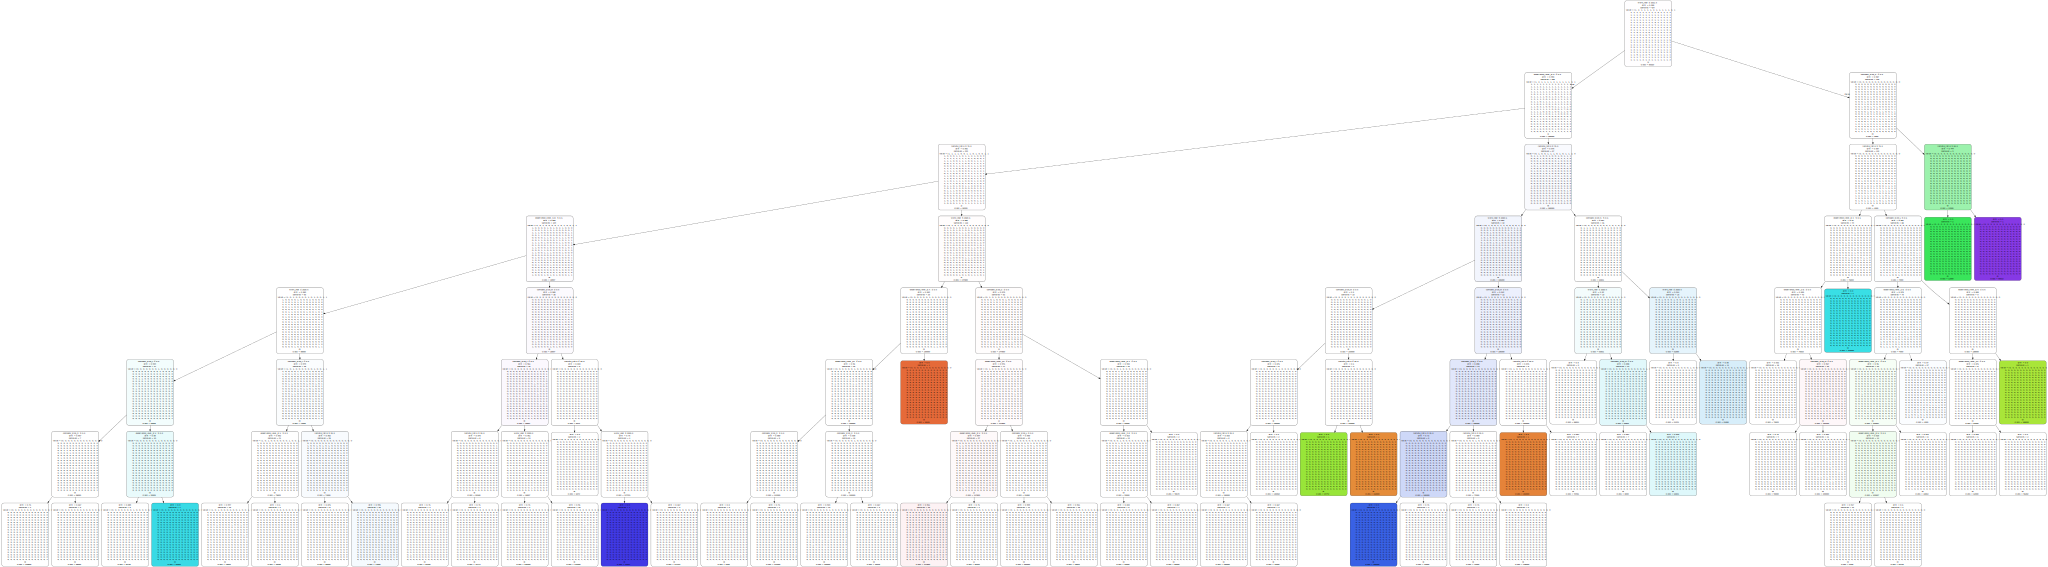

In [ ]:
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
list_features = [x for x in df_all_train.columns if x != 'salary_in_usd']
data = export_graphviz(model_max_depth,out_file=None,feature_names=list_features,class_names=df_all_train.salary_in_usd.unique().astype(str),   
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(data)
graph